# Descriptive scaling relations and residual analysis for US, China, and EU

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import pandas as pd
import statsmodels.api as sm
from scipy import stats

# import custom functions in myFunctions.ipynb
import ipynb.fs.defs.myFunctions as myFun

In [2]:
# load data
eu = pd.read_pickle("Data/eu_2016_gnc_oecd")
us = pd.read_pickle("Data/US_gnc_gdp_pop2016")
china = pd.read_pickle("Data/china_gnc_gdp_pop2016_est_pop_from_gdp")

In [5]:
# a dictionary that that maps different columne names to dataset to the same name
varNames = {"china": {"pop": "pop_est", "gdp": "gdp_yuan"}, 
            "us": {"pop": "pop2016", "gdp": "gdp2016"}, 
            "eu": {"pop": "population", "gdp": "gdp"}
           }

## Plot scaling relationship between population, GDP, and GNC

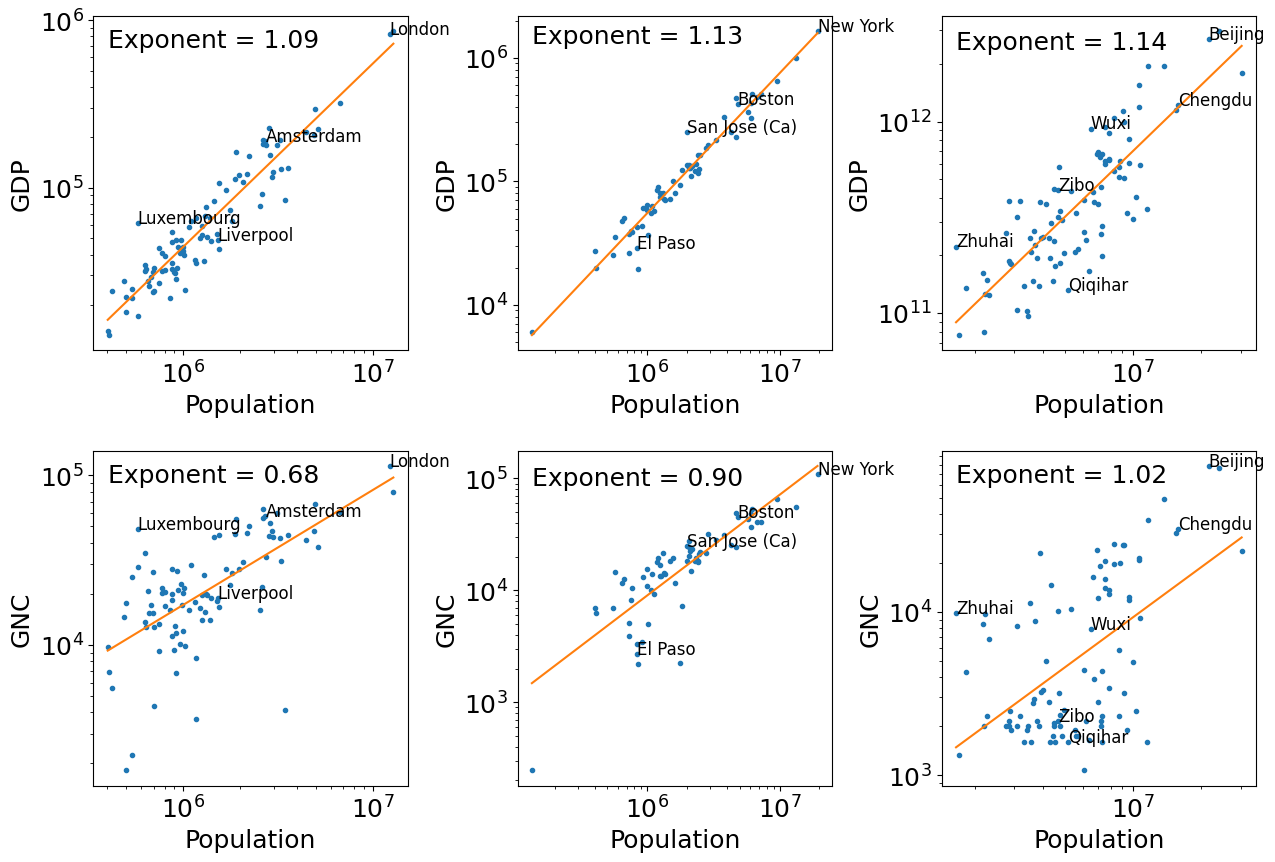

In [6]:
plt.figure(figsize = (15, 10))
total_col  = 3
    
eu_annotate = ["London","Amsterdam",'Luxembourg', "Liverpool" ]
us_annotate = ["New York", "Boston", "El Paso", "San Jose (Ca)"]

china_annotate = ["Beijing", "Chengdu", "Qiqihar", "Zibo", "Zhuhai", "Wuxi"]




myFun.descriptive_scaling(eu, total_col, 1, varNames["eu"]["pop"], varNames["eu"]["gdp"] , "gncAbs", eu_annotate)
myFun.descriptive_scaling(us, total_col, 2, varNames["us"]["pop"], varNames["us"]["gdp"] , "gncAbs", us_annotate)
myFun.descriptive_scaling(china, total_col, 3, varNames["china"]["pop"],varNames["china"]["gdp"] , "gncAbs", china_annotate)
plt.subplots_adjust(wspace = 0.35, hspace = 0.3)



## Analyze the SAMI for three regions

In [7]:
def compute_log_residual(df, xvar, yvar, beta, c): 
    """
    Compute the log scaling residual (SAMI). Compute the logs of variables first
    beta, c = regression best fit of the log-transformed variables.  
    """
    logx = np.log(df[xvar])
    logy = np.log(df[yvar])
    logy_pred = logx*beta + c
    logy_residual = logy - logy_pred
    return logy_residual

def process_1_country(df, xvar, yvar, residualVarName = "logGdpResidual"):
    """
    Compute log residuals for one country
    """
    beta, c = myFun.fit_scaling(df[xvar], df[yvar], plot = 0)
    df[residualVarName] = compute_log_residual(df, xvar, yvar, beta, c)
    
    return df

In [8]:
# compute GDP residuals for three countries
for key, df in {"eu": eu, "us":us, "china": china}.items(): 
    df = process_1_country(df, varNames[key]["pop"], varNames[key]["gdp"], "logGdpResidual")
    
# compute the gnc rediduals for 3 countries.
for key, df in {"eu": eu, "us":us, "china": china}.items(): 
    df = process_1_country(df, varNames[key]["pop"], "gncAbs", "logGncResidual")

## Plot the correlations between residuals

best fit equations: y = 0.21 x + 0.00
PearsonRResult(statistic=0.4222790158321026, pvalue=2.240822757474153e-05)
best fit equations: y = 0.23 x + -0.00
PearsonRResult(statistic=0.5500028195049496, pvalue=1.7221787692753469e-06)
best fit equations: y = 0.33 x + 0.00
PearsonRResult(statistic=0.6607530890242876, pvalue=3.191182540308345e-13)


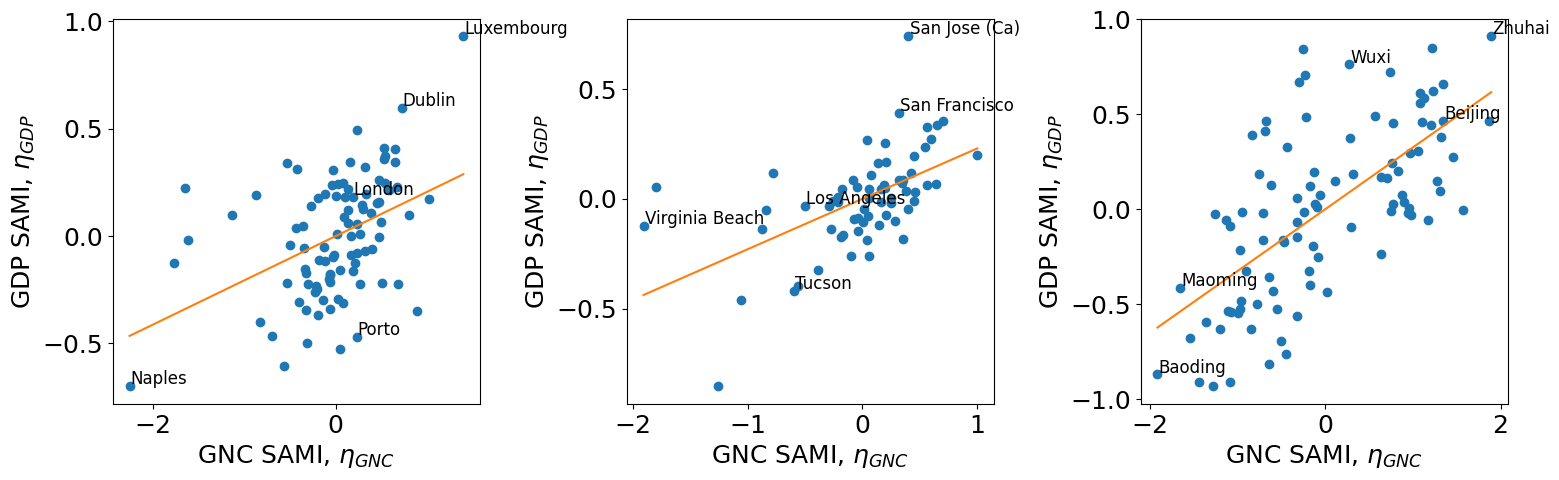

In [23]:
def plot_residuals(df, xResVar, yResVar, gncVar, annotateList):
    """
    Plot two scaling residials against each other, 
    annotateList: a list of selected cities to annotate on the graph. 
    """
    m, b = myFun.plotLinear(df,xResVar , yResVar, gncVar , annotateList, delta = 0.01, plotLine = 1, dotmarker = "o")
    print(stats.pearsonr(df[xResVar], df[yResVar]))
    
    plt.xlabel('GNC SAMI, ' + str(r"$\eta_{GNC}$"))
    plt.ylabel('GDP SAMI, ' +str(r"$\eta_{GDP}$"))



plt.figure(figsize = (18, 5))
# eu
plt.subplot(1, 3, 1)
plot_residuals(eu, "logGncResidual", "logGdpResidual", "city_gnc", ['London', 'Luxembourg', 'Naples', 'Dublin', 'Porto'])
# us
plt.subplot(1, 3, 2)
plot_residuals(us, "logGncResidual", "logGdpResidual", "city_gnc", ['Virginia Beach', 'Tucson', 'Los Angeles', 'San Francisco', 'San Jose (Ca)'])
# china
plt.subplot(1, 3, 3)
plot_residuals(china, "logGncResidual", "logGdpResidual", "city_gnc", ['Baoding', 'Zhuhai', 'Wuxi', 'Beijing', 'Maoming'])

plt.subplots_adjust(wspace = 0.4, hspace = 0.2)
plt.show()